In [1]:
# Automatic reloading of imports
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt
import numpy as np

# Put in the pyodine path on your machine here!
pyodine_path = '/Users/samkleiman/pyodine/'

sys.path.append(pyodine_path)

import pyodine
import pyodine_combine_vels   

In [2]:
import utilities_song as utilities

Pars = utilities.timeseries_parameters.Timeseries_Parameters()

In [3]:
# Individual result files to use
parent_dir = os.path.join(pyodine_path, 'tutorial_data/obs_results')
res_files = [os.path.join(parent_dir, f, f+'_res1.h5') for f in os.listdir(parent_dir)]
res_files.sort()

# The directory for analysis plots
plot_dir = os.path.join(pyodine_path, 'tutorial_data/vel_results')

# The output name of the CombinedResults object
comb_res_out = os.path.join(plot_dir, 'sigdra_tutorial_comb.h5')

# The output name of the velocity results text file
vels_out = os.path.join(plot_dir, 'sigdra_tutorial.vels')

# Log files
error_file = os.path.join(plot_dir, 'error.log')
info_file  = os.path.join(plot_dir, 'info.log')

In [4]:
bary_dict = {
    'star_name': 'HIP96100',
    #'star_ra': 0.0,          # in deg
    #'star_dec': 0.0,
    #'star_pmra': 0.0,        # in mas/yr
    #'star_pmdec': 0.0,
    #'star_rv0': 0.0,         # in m/s
    #'instrument_lat': 0.0,   # in deg
    #'instrument_long': 0.0, 
    #'instrument_alt': 0.0    # in m
}

In [5]:
Results = pyodine_combine_vels.combine_velocity_results(
    Pars, res_files=res_files, plot_dir=plot_dir, comb_res_out=comb_res_out, 
    vels_out=vels_out, bary_dict=bary_dict, error_log=error_file, info_log=info_file)



Branch: master
Hash: c2a71ac
---------------------------
Weighting and combining velocities
Non-existing files:
/Users/samkleiman/pyodine/tutorial_data/obs_results/.DS_Store/.DS_Store_res1.h5


  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 25% (5 of 20) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 50% (10 of 20) |############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 70% (14 of 20) |################        | Elapsed Time: 0:00:00 ETA:   0:00:00
 80% (16 of 20) |###################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 85% (17 of 20) |####################    | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (20 of 20) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



Star: HD185144

Velocity weighting and combination...
---------------------------------------------------
- Pyodine chunk combination (based on iSONG code) -
---------------------------------------------------

Weighting parameters used:
	good_chunks	3	4	5	6	7	8	9	10	11	12	13	14	
	good_orders	6	7	8	9	10	11	12	13	
	sig_limit_low	4.0
	sig_limit_up	1000.0
	sig_correct	1000.0
	reweight_alpha	1.8
	reweight_beta	8.0
	reweight_sigma	2.0
	weight_correct	0.01

Nr. of obs, chunks per obs: 20, 528

Chunk-to-chunk offsets from observation mean:
Median: 6.53 +- 204.36

Chunk sigmas:
Median: 48.72 +- 36.50

RV quality factor 1 ( sqrt(1/sum(1/sig**2)) ): 1.76502 m/s
RV quality factor 2 ( sqrt(1/sum(med(wt1))) ): 1.76502 m/s

Doing the precise barycentric velocity correction...
Using BVC information from user-supplied dictionary...
BVC through HIP number: 96100

Writing results to txt file: /Users/samkleiman/pyodine/tutorial_data/vel_results/sigdra_tutorial.vels

Saving combined results to /Users/sam

In [6]:
Results = pyodine.timeseries.base.CombinedResults(os.path.join(plot_dir, 'sigdra_tutorial_comb.h5'))


Loading combined results from /Users/samkleiman/pyodine/tutorial_data/vel_results/sigdra_tutorial_comb.h5


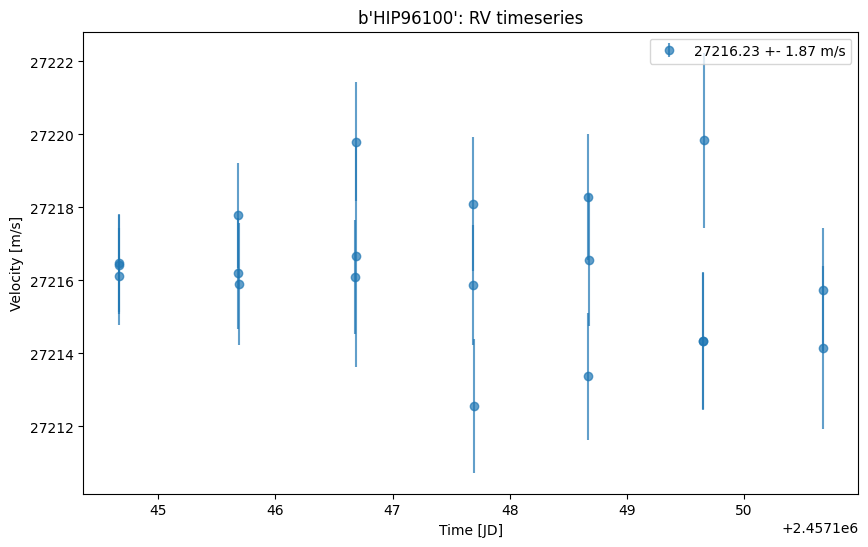

In [7]:
# The barycentric date, corrected bary date (shifted to solar system center),
# RV with barycentric correction, and RV uncertainty
bary_date      = Results.bary_date
bary_date_corr = Results.bary_date_corr
rv_bc          = Results.rv_bc
rv_err         = Results.rv_err

star_name = Results.info['star_name']     # the star name

# And plot
fig = plt.figure(figsize=(10,6))
plt.errorbar(bary_date_corr, rv_bc, yerr=rv_err, fmt='o', alpha=0.7,
            label='{:.2f} +- {:.2f} m/s'.format(np.mean(rv_bc), np.std(rv_bc)))
plt.legend()
plt.xlabel('Time [JD]')
plt.ylabel('Velocity [m/s]')
plt.title('{}: RV timeseries'.format(star_name))
plt.show()

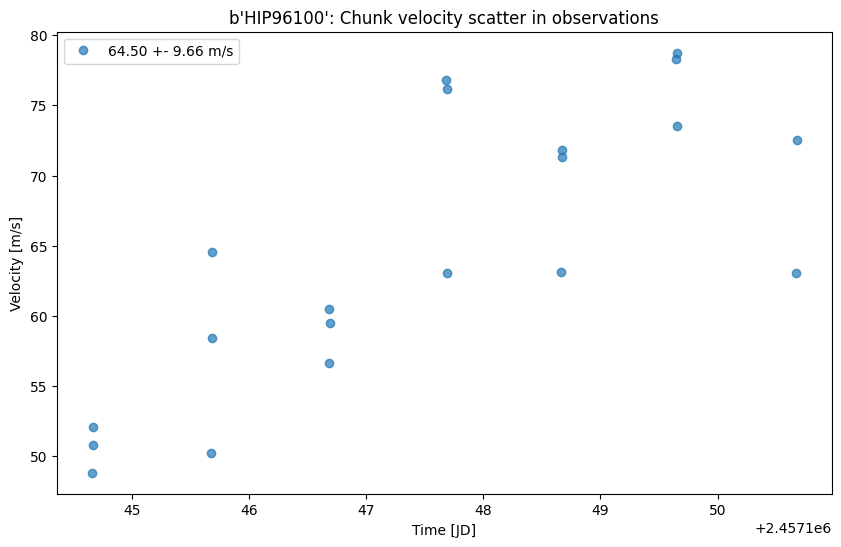

In [8]:
c2c_scatter = Results.c2c_scatter

fig = plt.figure(figsize=(10,6))
plt.plot(bary_date_corr, c2c_scatter, 'o', alpha=0.7,
        label='{:.2f} +- {:.2f} m/s'.format(np.mean(c2c_scatter), np.std(c2c_scatter)))
plt.legend()
plt.xlabel('Time [JD]')
plt.ylabel('Velocity [m/s]')
plt.title('{}: Chunk velocity scatter in observations'.format(star_name))
plt.show()

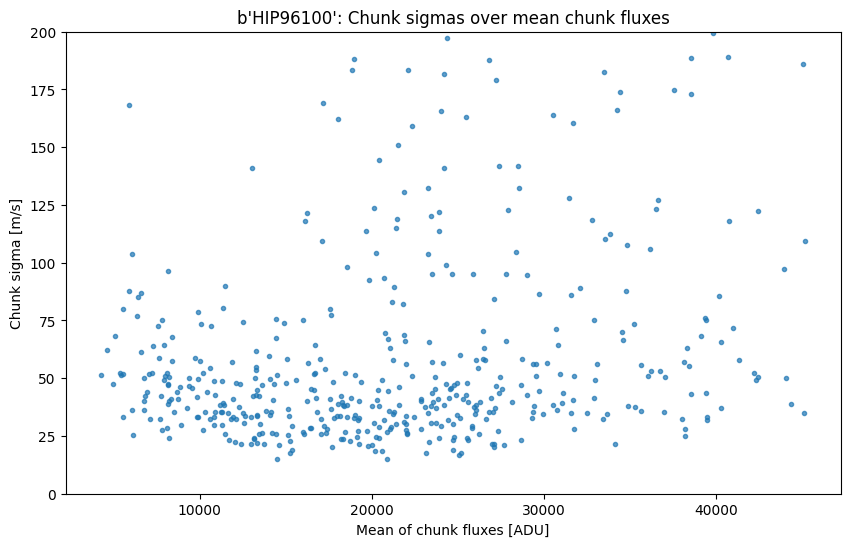

In [9]:
# Extract the median counts (medcnts) of each chunk in each observation, and average them over the observations
medcnts_mean = np.mean(Results.medcnts, axis=0)
# Extract the chunk sigmas
chunk_sigma  = Results.auxiliary['chunk_sigma']

fig = plt.figure(figsize=(10,6))
plt.plot(medcnts_mean, chunk_sigma, '.', alpha=0.7)
plt.xlabel('Mean of chunk fluxes [ADU]')
plt.ylabel('Chunk sigma [m/s]')
plt.ylim(0,200)
plt.title('{}: Chunk sigmas over mean chunk fluxes'.format(star_name))
plt.show()

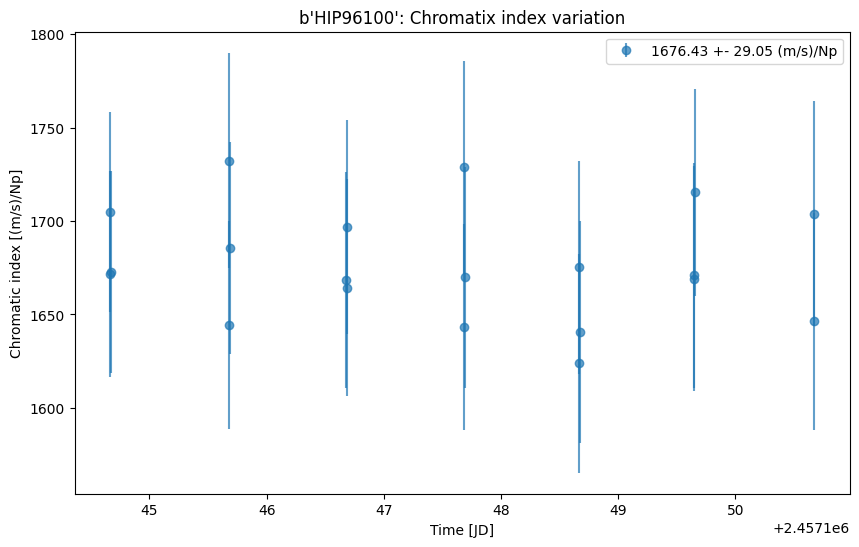

In [10]:
crx     = Results.crx
crx_err = Results.crx_err

fig = plt.figure(figsize=(10,6))
plt.errorbar(bary_date_corr, crx, yerr=crx_err, fmt='o', alpha=0.7,
            label='{:.2f} +- {:.2f} (m/s)/Np'.format(np.mean(crx), np.std(crx)))
plt.legend()
plt.xlabel('Time [JD]')
plt.ylabel('Chromatic index [(m/s)/Np]')
plt.title('{}: Chromatix index variation'.format(star_name))
plt.show()

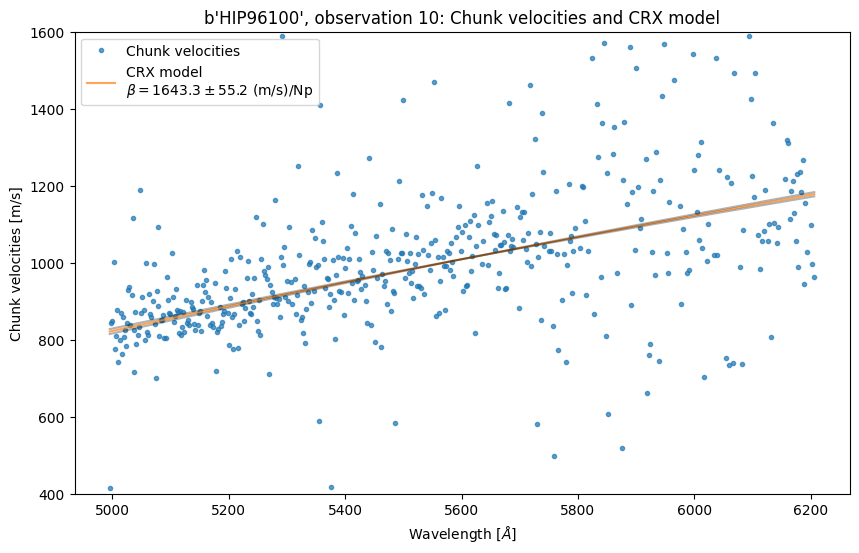

In [11]:
obs_ind = 10     # observation index

# The chunk wavelength intercepts of the observation
wave_int     = Results.params['wave_intercept'][obs_ind]
# The chunk velocities of the observation
velocity     = Results.params['velocity'][obs_ind]
# The weighted RV of the observation
rv_obs       = Results.rv[obs_ind]
# The CRX model effective wavelength of the RV (and error)
RV_wave      = Results.RV_wave[obs_ind]
RV_wave_err  = Results.RV_wave_err[obs_ind]
# The CRX model chromatic index (and error)
crx_obs      = Results.crx[obs_ind]
crx_obs_err  = Results.crx_err[obs_ind]

# Compute the velocities from the CRX model, along with upper and lower uncertainty
velocities_fit = pyodine.timeseries.combine_vels.velocity_from_chromatic_index(
    wave_int, rv_obs, RV_wave, crx_obs)
velocities_fit_lower = pyodine.timeseries.combine_vels.velocity_from_chromatic_index(
    wave_int, rv_obs-rv_err[obs_ind], RV_wave-RV_wave_err, crx_obs-crx_obs_err)
velocities_fit_upper = pyodine.timeseries.combine_vels.velocity_from_chromatic_index(
    wave_int, rv_obs+rv_err[obs_ind], RV_wave+RV_wave_err, crx_obs+crx_obs_err)

fig = plt.figure(figsize=(10,6))
plt.plot(wave_int, velocity, '.', alpha=0.7, label='Chunk velocities')
plt.plot(wave_int, velocities_fit, alpha=0.7, label='CRX model\n' + 
         r'$\beta={:.1f}\pm{:.1f}$ (m/s)/Np'.format(crx_obs, crx_obs_err))
plt.plot(wave_int, velocities_fit_lower, 'k', alpha=0.3)
plt.plot(wave_int, velocities_fit_upper, 'k', alpha=0.3)
plt.legend()
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Chunk velocities [m/s]')
plt.ylim(400., 1600.)
plt.title('{}, observation {}: Chunk velocities and CRX model'.format(star_name, obs_ind))
plt.show()